### Feature selection ###

1. split dataset training & testing (70 : 30)
2. Develop linear regression
3. Evaluasi model menggunakkan metrik sesuai (MSE, RMSE atau R squared)
4. interpretasi hasil & insight model performance

In [1]:
import numpy as numpy
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
#import data
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.shape

(1460, 81)

In [6]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
#data cleaning
meanLotFrontage=df['LotFrontage'].mean()
meanLotFrontage

np.float64(70.04995836802665)

In [8]:
#fillna -> isi yang kosong 
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [9]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

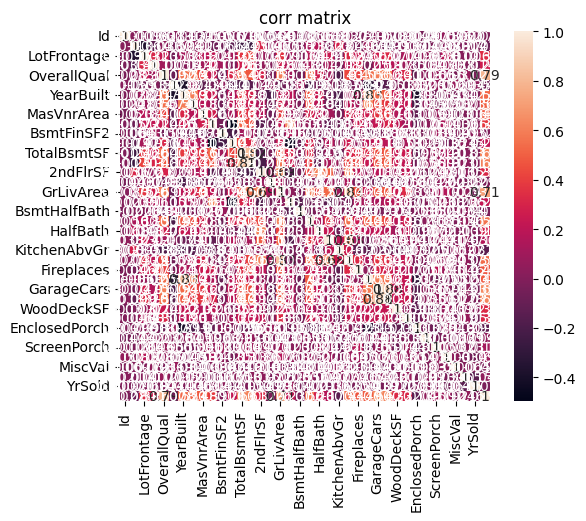

<Figure size 5000x6000 with 0 Axes>

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.select_dtypes(include=['number']).corr()

sns.heatmap(corr_matrix, square=True, annot=True)
plt.title("corr matrix")
plt.figure(figsize=(50, 60))
plt.show()

In [11]:
# #ambil 10 kolom saja
# from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV, ElasticNetCV
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_squared_error

In [12]:
#prioritas yang berkaitan dengan taregt / biaya properti
# Memisahkan kolom berdasarkan tipe data
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns



In [13]:
# Korelasi kolom numerik dengan SalePrice
correlations = df[numeric_cols].corrwith(df['SalePrice'])

# Menampilkan korelasi yang signifikan
significant_numeric = correlations[abs(correlations) > 0.3]
print("Kolom numerik dengan korelasi signifikan terhadap SalePrice:")
print(significant_numeric)

#10 data korelasi tertinggi
# SalePrice       1.000000
# OverallQual     0.790982
# GrLivArea       0.708624
# GarageCars      0.640409
# GarageArea      0.623431
# TotalBsmtSF     0.613581
# 1stFlrSF        0.605852
# FullBath        0.560664
# TotRmsAbvGrd    0.533723
# YearBuilt       0.522897
# YearRemodAdd    0.507101

Kolom numerik dengan korelasi signifikan terhadap SalePrice:
LotFrontage     0.334901
OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
BsmtFinSF1      0.386420
TotalBsmtSF     0.613581
1stFlrSF        0.605852
2ndFlrSF        0.319334
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
WoodDeckSF      0.324413
OpenPorchSF     0.315856
SalePrice       1.000000
dtype: float64


In [14]:
#sort 10 data ascending(terbesar)
sorted_desc=significant_numeric.sort_values(ascending=False)
print(sorted_desc)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.334901
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
dtype: float64


In [15]:
# #drop kolom yang tidak diperlukan (korelasi kecil)

# df.drop(columns=["GarageYrBlt", "MasVnrArea", "Fireplaces", "BsmtFinSF1", "LotFrontage", "WoodDeckSF", "2ndFlrSF", "OpenPorchSF"], inplace=True)

In [16]:
top_10 = sorted_desc.head(11)

# Dapatkan nama kolom dari top_10
columns_to_keep = top_10.index.tolist()

# Drop kolom lain selain top_10
df_reduced = df[columns_to_keep + ['SalePrice']]  # Tambahkan 'SalePrice' agar target tetap ada

# Menampilkan DataFrame yang hanya berisi kolom penting
print(df_reduced)


      SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0        208500            7       1710           2         548          856   
1        181500            6       1262           2         460         1262   
2        223500            7       1786           2         608          920   
3        140000            7       1717           3         642          756   
4        250000            8       2198           3         836         1145   
...         ...          ...        ...         ...         ...          ...   
1455     175000            6       1647           2         460          953   
1456     210000            6       2073           2         500         1542   
1457     266500            7       2340           1         252         1152   
1458     142125            5       1078           1         240         1078   
1459     147500            5       1256           1         276         1256   

      1stFlrSF  FullBath  TotRmsAbvGrd 

In [17]:
df_reduced = df.drop(columns=[col for col in df.columns if col not in columns_to_keep + ['SalePrice']], inplace=True)

In [18]:
print(df.columns)

#10 data korelasi tertinggi
# SalePrice       1.000000
# OverallQual     0.790982
# GrLivArea       0.708624
# GarageCars      0.640409
# GarageArea      0.623431
# TotalBsmtSF     0.613581
# 1stFlrSF        0.605852
# FullBath        0.560664
# TotRmsAbvGrd    0.533723
# YearBuilt       0.522897
# YearRemodAdd    0.507101

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


In [19]:
df.head(10)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000
5,5,1993,1995,796,796,1362,1,5,2,480,143000
6,8,2004,2005,1686,1694,1694,2,7,2,636,307000
7,7,1973,1973,1107,1107,2090,2,7,2,484,200000
8,7,1931,1950,952,1022,1774,2,8,2,468,129900
9,5,1939,1950,991,1077,1077,1,5,1,205,118000


### 1. split dataset training & testing (70 : 30)


In [20]:
features=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 
            '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

x=df[features]
y=df['SalePrice']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1,test_size=0.3)

In [22]:
print(X_train.shape)
print(y_train.shape)

(1022, 10)
(1022,)


### 2. Develop linear regression ###

In [23]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score

In [24]:
LR = LinearRegression()

#fit model
LR.fit(X_train, y_train)

LinearRegression()

In [25]:
X_test_array = X_test.values


In [26]:
#prediksi nilai pada data
y_pred_train = LR.predict(X_train)
print(y_pred_train)

[204006.22786964 228146.80728942 134302.29170412 ... 126529.74143386
 119386.98172207  95320.15262364]


In [27]:
# regression coefficients
print('Coefficients: ', LR.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(LR.score(X_test, y_test)))


Coefficients:  [ 1.95950131e+04  3.65932878e+01  1.45935524e+04  7.79097464e+00
  1.73174736e+01  1.52523075e+01 -2.62045820e+03  2.38926872e+03
  2.26793705e+02  3.02043482e+02]
Variance score: 0.8190294829326777


In [28]:
x_val = df[features].values.reshape(-1, len(features))
y_val = df['SalePrice'].values


In [29]:
LR.score(x_val, y_val)

c:\Users\graze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.770272863364791

In [30]:
y_pred_test = LR.predict(X_test) # prediksi fitur dari test

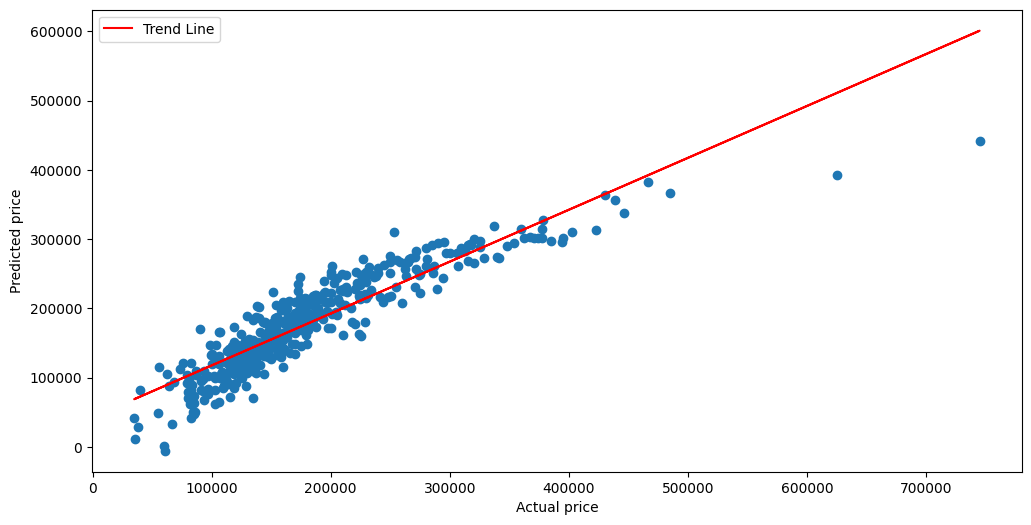

In [31]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,6))

plt.scatter(y_test, y_pred_test)


slope, intercept = np.polyfit(y_test, y_pred_test, 1)  # 1 = linear
plt.plot(y_test, slope * y_test + intercept, color='red', label='Trend Line')


plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.legend()

plt.show()



In [32]:
output = pd.DataFrame({
    'actual_price':y_test,
    'predicted_price' : y_pred_test
})

output.head()

,actual_price,predicted_price
258,231500,219027.126132
267,179500,161625.781156
288,122000,107887.543593
649,84500,49963.165198
1233,142000,142825.880220


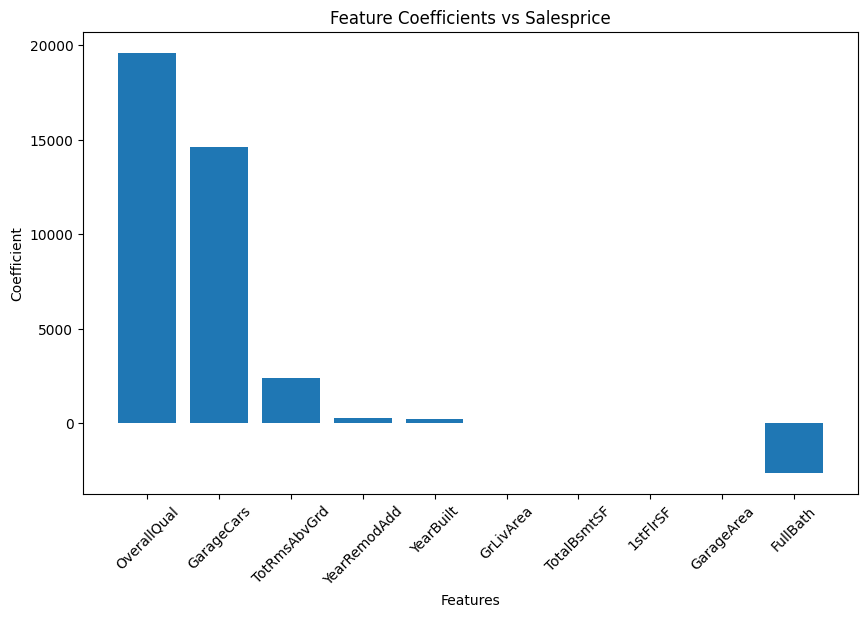

In [33]:
coefficients = LR.coef_

# Buat DataFrame untuk visualisasi
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plot diagram batang
plt.figure(figsize=(10, 6))
plt.bar(coef_df['Feature'], coef_df['Coefficient'])
plt.title('Feature Coefficients vs Salesprice')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.show()

### 3. Evaluasi model menggunakkan metrik sesuai (MSE, RMSE atau R squared)

In [34]:
# Evaluasi model MSE dan R2
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Tampilkan hasil evaluasi
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
# Menampilkan koefisien dan intercept dari model
# print("Koefisien:", LR.coef_)
# print("Intercept:", LR.intercept_)

Mean Squared Error (MSE): 1292184293.8367603
R-squared (R²): 0.8190294829326777
RMSE: 35946.9650156555


In [35]:
mape = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
print(f"MAPE: {mape}%")

MAPE: 14.066438324259767%


In [36]:
import pandas as pd

#nilai aktual y_train, y_test (data asli)
min_actual = min(y_test)
max_actual = max(y_test)

min_predict=min(y_pred_test)
max_predict=max(y_pred_test)

print(f'Rentang data asli : {min_actual}-{max_actual}')
print(f'Rentang data prediksi : {min_predict}-{max_predict}')

Rentang data asli : 34900-745000
Rentang data prediksi : -5615.595568361925-441366.4980979613


### 4. interpretasi hasil & insight model performance

* Mean Squared Error (MSE): 1292184293.8367603
* R-squared (R²): 0.8190294829326777
* RMSE: 35946.9650156555
* MAPE: 14.066438324259767%

- Berdasarkan hasil prediksi R^2 = 0.8190 menunjukkan model mampu menjelaskan 81.90% dari data aktual (berhasil menangkap sebagian besar pola data cukup baik)

- MSE = 1,292,184,293.8367603 menunjukkan bahwa rata-rata kesalahan kuadrat model dalam memprediksi harga adalah sekitar 1,29 miliar 

- MAPE menunjukkan bahwa model prediksi memiliki kesalahan rata-rata sebesar 14.06% yang menunjukkan hasil prediksi cukup baik 

Secara keseluruhan grafik scatter plot dan trend line menunjukan hubungan harga aktual(y_test) dengan harga prediksi(y_pred_test) dapat dilihat model mampu mengikuti pola data aktual (titik-titik pada plot terpusat disekitar garis merah/trend line) menunjukkan performance prediksi cukup akurat mengikuti pola harga aktual




